In [83]:
#!nvidia-smi

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## Train/test split

In [85]:
provinces = ['BKK','Chiangmai','Khonkaen','Rayong','Saraburi','Surat']
province = provinces[0]

In [86]:
data_training = pd.read_csv(province+'/train/'+province.lower()+'_train_format.csv', date_parser = True)
data_training.sample(5)

,date_time,PM2.5,temp,wind speed,wind dir,lat,long
6331,2018-03-21 19:00:00,28.0,31.3,3.0,30.0,13.729984,100.536443
17973,2019-07-19 21:00:00,10.0,30.6,5.0,265.0,13.729984,100.536443
374,2017-07-16 14:00:00,15.0,30.5,43.0,275.0,13.729984,100.536443
3082,2017-11-06 10:00:00,53.0,22.8,47.0,100.0,13.729984,100.536443
5443,2018-02-12 19:00:00,45.0,30.2,23.0,70.0,13.729984,100.536443


In [87]:
data_training = data_training.drop(['date_time', 'lat', 'long'], axis = 1)
data_training.head()

,PM2.5,temp,wind speed,wind dir
0,14.0,27.9,16.0,260.0
1,10.0,27.9,16.0,260.0
2,17.0,27.9,16.0,260.0
3,20.0,27.9,16.0,260.0
4,15.0,27.4,16.0,255.0


In [88]:
data_test = pd.read_csv(province+'_clean.csv', date_parser = True)
data_test.sample(5)

,Unnamed: 0,date_time,PM2.5,temp,wind speed,wind dir,lat,long
80,80,2020-07-04 08:00:00,27.0,27.9,31,255,13.729984,100.536443
5357,5357,2021-02-09 05:00:00,32.0,25.9,19,210,13.729984,100.536443
7265,7265,2021-04-29 17:00:00,18.0,28.6,13,170,13.729984,100.536443
8363,8363,2021-06-14 11:00:00,16.0,31.0,36,255,13.729984,100.536443
7366,7366,2021-05-03 22:00:00,20.0,30.6,5,75,13.729984,100.536443


In [89]:
data_test = data_test.drop(['Unnamed: 0', 'lat', 'long'], axis = 1)
data_test.head()

,date_time,PM2.5,temp,wind speed,wind dir
0,2020-07-01 00:00:00,9.0,29.4,35,270
1,2020-07-01 01:00:00,8.0,29.4,42,260
2,2020-07-01 02:00:00,12.0,28.5,42,260
3,2020-07-01 03:00:00,9.0,28.5,42,260
4,2020-07-01 04:00:00,8.0,28.3,55,270


## Normalize data

In [90]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)

In [91]:
scaler.inverse_transform(data_training)

array([[ 14. ,  27.9,  16. , 260. ],
       [ 10. ,  27.9,  16. , 260. ],
       [ 17. ,  27.9,  16. , 260. ],
       ...,
       [ 17. ,  30.3,  36. , 265. ],
       [  5. ,  29.4,  35. , 270. ],
       [  7. ,  29.4,  35. , 270. ]])

In [92]:
scale = 1/scaler.scale_
temp = (data_training * scale) + scaler.min_
temp

array([[ 10.97637795,   9.87703349,  16.        , 260.        ],
       [  6.97637795,   9.87703349,  16.        , 260.        ],
       [ 13.97637795,   9.87703349,  16.        , 260.        ],
       ...,
       [ 13.97637795,  12.27703349,  36.        , 265.        ],
       [  1.97637795,  11.37703349,  35.        , 270.        ],
       [  3.97637795,  11.37703349,  35.        , 270.        ]])

In [93]:
data_training[0:10]

array([[0.08661417, 0.51196172, 0.18823529, 0.72222222],
       [0.05511811, 0.51196172, 0.18823529, 0.72222222],
       [0.11023622, 0.51196172, 0.18823529, 0.72222222],
       [0.13385827, 0.51196172, 0.18823529, 0.72222222],
       [0.09448819, 0.48803828, 0.18823529, 0.70833333],
       [0.1023622 , 0.48803828, 0.18823529, 0.70833333],
       [0.15748031, 0.48803828, 0.18823529, 0.70833333],
       [0.15748031, 0.51674641, 0.2       , 0.65277778],
       [0.19685039, 0.51674641, 0.2       , 0.65277778],
       [0.18897638, 0.51674641, 0.2       , 0.65277778]])

In [94]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [95]:
X_train.shape

(26244, 60, 4)

# Building Model1: LSTM

In [96]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [97]:
tf.__version__

'2.8.0'

In [98]:
modelLSTM = Sequential()

modelLSTM.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 4)))
modelLSTM.add(Dropout(0.2))

# modelLSTM.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))

modelLSTM.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
modelLSTM.add(Dropout(0.2))


# modelLSTM.add(LSTM(units = 160, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))
# modelLSTM.add(LSTM(units = 160, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))
# modelLSTM.add(LSTM(units = 160, activation = 'relu', return_sequences = True))
# modelLSTM.add(Dropout(0.2))


modelLSTM.add(LSTM(units = 120, activation = 'relu'))
modelLSTM.add(Dropout(0.2))



modelLSTM.add(Dense(units = 1))

In [99]:
modelLSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 60)            15600     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)               96480     
                                                                 
 dropout_7 (Dropout)         (None, 120)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [100]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [101]:
#create callback
filepath = 'my_best_modelLSTM_yourself.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='loss',
                             verbose=0, 
                             save_best_only=True,
                             mode='min')

earlystopping = EarlyStopping(
    monitor='loss', 
    patience=3, 
    min_delta=0, 
    mode='auto'
)

reduce_lr = ReduceLROnPlateau(
    monitor='loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=0
)
callbacks = [checkpoint, earlystopping, reduce_lr]

In [102]:
modelLSTM.compile(optimizer='adam', loss = 'mean_squared_error')

In [103]:
history = modelLSTM.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=callbacks)

Epoch 1/10
821/821 [==============================] - 179s 213ms/step - loss: 0.0059 - lr: 0.0010
Epoch 2/10
821/821 [==============================] - 183s 222ms/step - loss: 0.0032 - lr: 0.0010
Epoch 3/10
821/821 [==============================] - 174s 212ms/step - loss: 0.0027 - lr: 0.0010
Epoch 4/10
821/821 [==============================] - 180s 219ms/step - loss: 0.0025 - lr: 0.0010
Epoch 5/10
821/821 [==============================] - 163s 199ms/step - loss: 0.0024 - lr: 0.0010
Epoch 6/10
821/821 [==============================] - 184s 224ms/step - loss: 0.0023 - lr: 0.0010
Epoch 7/10
821/821 [==============================] - 174s 212ms/step - loss: 0.0022 - lr: 0.0010
Epoch 8/10
821/821 [==============================] - 174s 212ms/step - loss: 0.0022 - lr: 0.0010
Epoch 9/10
821/821 [==============================] - 155s 188ms/step - loss: 0.0022 - lr: 0.0010
Epoch 10/10
821/821 [==============================] - 141s 171ms/step - loss: 0.0021 - lr: 0.0010


# Testing

In [104]:
data_training = pd.read_csv(province+'/train/'+province.lower()+'_train_format.csv', date_parser = True)
data_training = data_training.drop(['date_time', 'lat', 'long'], axis = 1)

In [105]:
data_training.tail(60)

,PM2.5,temp,wind speed,wind dir
26244,14.0,31.6,12.0,260.0
26245,15.0,33.0,11.0,245.0
26246,18.0,33.0,11.0,245.0
26247,14.0,33.0,11.0,245.0
26248,13.0,32.5,15.0,250.0
26249,9.0,32.5,15.0,250.0
26250,9.0,32.5,15.0,250.0
26251,10.0,30.7,17.0,285.0
26252,7.0,30.7,17.0,285.0
26253,10.0,30.7,17.0,285.0


In [106]:
data_test = data_test.drop(['date_time'], axis = 1)
data_test.head()

,PM2.5,temp,wind speed,wind dir
0,9.0,29.4,35,270
1,8.0,29.4,42,260
2,12.0,28.5,42,260
3,9.0,28.5,42,260
4,8.0,28.3,55,270


## Prepare testing data

In [107]:
past_60_days = data_training.tail(60)

In [108]:
df = past_60_days.append(data_test, ignore_index = True)
df.head()

,PM2.5,temp,wind speed,wind dir
0,14.0,31.6,12.0,260.0
1,15.0,33.0,11.0,245.0
2,18.0,33.0,11.0,245.0
3,14.0,33.0,11.0,245.0
4,13.0,32.5,15.0,250.0


In [109]:
df.dropna(inplace=True)

In [110]:
df.shape

(7874, 4)

In [111]:
inputs = scaler.transform(df)
inputs

array([[0.08661417, 0.68899522, 0.14117647, 0.72222222],
       [0.09448819, 0.75598086, 0.12941176, 0.68055556],
       [0.11811024, 0.75598086, 0.12941176, 0.68055556],
       ...,
       [0.08661417, 0.60287081, 0.23529412, 0.69444444],
       [0.08661417, 0.56937799, 0.18823529, 0.68055556],
       [0.08661417, 0.55980861, 0.16470588, 0.65277778]])

In [112]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [113]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((7814, 60, 4), (7814,))

## Model prediction

In [114]:
y_pred = modelLSTM.predict(X_test)

In [115]:
y_pred

array([[0.07012574],
       [0.07356675],
       [0.07220539],
       ...,
       [0.09042338],
       [0.0894975 ],
       [0.09149192]], dtype=float32)

In [116]:
scaler.scale_

array([0.00787402, 0.04784689, 0.01176471, 0.00277778])

In [117]:
scale = 1/scaler.scale_[0]
scale

127.0

In [118]:
y_pred = y_pred*scale
y_test = y_test*scale

In [119]:
import math
from sklearn.metrics import mean_squared_error

print(province+' RMSE =', math.sqrt(mean_squared_error(y_test, y_pred)) )

BKK RMSE = 2.765100764624348


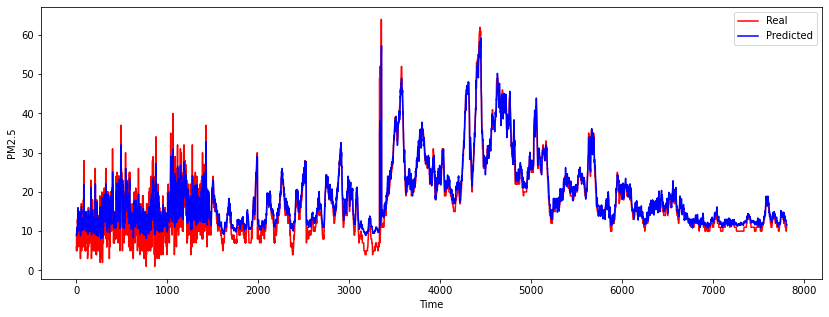

In [120]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [121]:
import pickle

with open('lstm_'+province.lower()+'_2.pickle', 'wb') as fp:
    pickle.dump(y_pred, fp)

In [122]:
df1 = pd.DataFrame(y_pred)

In [123]:
df1.to_csv('lstm_'+province.lower()+'_2.csv')